# Import template 

In [ ]:
%run Template.ipynb

ERROR:root:File `'Template.ipynb.py'` not found.


# Definit env (collab ou local)

In [ ]:
isCollab = True
pathLogMel = "npy/"
pathDriveSaveFile = "models_save/"

if isCollab:
    pathLogMel = "/content/drive/MyDrive/Datascience projet son/LogMel/"
    pathDriveSaveFile = "/content/drive/MyDrive/Datascience projet son/You/Auto_save_AE_"

# liens chargement enregistrement 

In [ ]:
freq=256
dt=256
normal_val=0
anomaly_val=1

machine='fan'
EPOCHS=50

# chemin d'enregistrement de l'autosave AUTO ENCODER


In [ ]:
autosave_path=pathDriveSaveFile+ "Auto_save_AE_"+".hdf5"
model_save_path=pathDriveSaveFile+ 'autoencoder3D_'+machine+"_"+str(dt)+"_"+str(EPOCHS)+'E'+'.joblib'

In [ ]:
path_train=pathLogMel+machine+'_train_norm_'+str(dt)+'_'+str(freq)+'.npy' #path pour loader les data .npy
path_test=pathLogMel+machine+'_test_norm_'+str(dt)+'_'+str(freq)+'.npy'

# Sélection des données


In [ ]:
df_fan_train = df[ (df['Machine']== machine) & (df['train_test'] == 'train') ] # sélection de la machine fan
df_fan_valid = df[ (df['Machine']== machine) & (df['train_test'] == 'test') ] # sélection de la machine fan
y_norm_train= np.array(df_fan_train['son_type'])
y_norm_valid = np.array(df_fan_valid['son_type'])

NameError: ignored

# importation des fichiers npy


In [ ]:

data_train = np.load(path_train)
data_valid = np.load(path_test)


FileNotFoundError: [Errno 2] No such file or directory: 'npy/fan_train_norm_256_256.npy'

# reshaping


In [ ]:
data_train=data_train.reshape(-1,dt,freq)
data_valid=data_valid.reshape(-1,dt,freq)

# Parametres model

# Model complexe 64 

In [ ]:
from keras import layers


data_train = data_train.reshape((-1, dt, freq, 1))
input_sound = keras.Input(data_train.shape[1:])


# decoded = layers.Conv2D(1, (3, 3), padding='same')(x)
# x = layers.Conv2D(128, (3, 3), activation='relu',padding='same')(input_sound)
# x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(input_sound)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(4, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = layers.Conv2D(4, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu',padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu',padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu',padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), padding='same')(x)

autoencoder3D_AUG = keras.Model(input_sound, decoded)


autoencoder3D_AUG.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 256, 256, 1)]     0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 256, 256, 64)      640       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 128, 128, 32)      18464     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 64, 64, 16)        4624      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 32, 32, 16)        0   

In [ ]:
from keras.callbacks import ModelCheckpoint

autoencoder3D_AUG.compile(optimizer='adam', loss='mse',metrics=['accuracy'])

checkpoint = ModelCheckpoint(autosave_path, monitor='val_loss', verbose=1,
    save_best_only=True, mode='auto', period=10)

early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss',patience=100, mode='min',restore_best_weights=True)

# autoencoder3D_AUG=keras.models.load_model('best_model.hdf5')
# autoencoder3D_AUG.load_weights('Auto_save_fan_256_256.hdf5')

history3D_AUG = autoencoder3D_AUG.fit(data_train, data_train,
                              epochs=EPOCHS,
                              batch_size=32,
                              shuffle=True,
                              max_queue_size=10,
                            workers=4,use_multiprocessing=True,
                              validation_split=0.2,callbacks=[checkpoint,early_stopping])

NameError: name 'autoencoder3D_AUG' is not defined

# Model simple 1

In [ ]:
import keras
from keras import layers

data_train = data_train.reshape((-1, dt, freq, 1))
input_sound = keras.Input(data_train.shape[1:])

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_sound)
x = layers.SpatialDropout2D(0.3)(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.SpatialDropout2D(0.3)(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(4, (3, 3), activation='relu', padding='same')(x)
x = layers.SpatialDropout2D(0.3)(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = layers.Conv2D(4, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu',padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), padding='same')(x)


autoencoder3D_1 = keras.Model(input_sound, decoded)
autoencoder3D_1.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 256, 256, 1)]     0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 256, 256, 32)      320       
_________________________________________________________________
spatial_dropout2d_10 (Spatia (None, 256, 256, 32)      0         
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 128, 128, 8)       2312      
_________________________________________________________________
spatial_dropout2d_11 (Spatia (None, 128, 128, 8)       0         
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 64, 64, 8)         0   

# Model simple 2

In [ ]:
import keras
from keras import layers


data_train = data_train.reshape((-1, dt, freq, 1))
input_sound = keras.Input(data_train.shape[1:])

x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(input_sound)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(4, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu',padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), padding='same')(x)


autoencoder3D_2 = keras.Model(input_sound, decoded)
autoencoder3D_2.summary()

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 256, 256, 1)]     0         
_________________________________________________________________
conv2d_72 (Conv2D)           (None, 256, 256, 64)      640       
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 128, 128, 8)       4616      
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 64, 64, 8)         0         
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 64, 64, 4)         292       
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 32, 32, 4)         0   

# Model simple 3

In [ ]:
import keras
from keras import layers


data_train = data_train.reshape((-1, dt, freq, 1))
input_sound = keras.Input(data_train.shape[1:])

x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(input_sound)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(4, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(128, (3, 3), activation='relu',padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), padding='same')(x)


autoencoder3D_3 = keras.Model(input_sound, decoded)
autoencoder3D_3.summary()

Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 256, 256, 1)]     0         
_________________________________________________________________
conv2d_86 (Conv2D)           (None, 256, 256, 128)     1280      
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 128, 128, 128)     0         
_________________________________________________________________
conv2d_87 (Conv2D)           (None, 128, 128, 16)      18448     
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_88 (Conv2D)           (None, 64, 64, 4)         580       
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 32, 32, 4)         0  

# Model simple 4

In [ ]:
import keras
from keras import layers
from keras.layers import SpatialDropout2D

data_train = data_train.reshape((-1, dt, freq, 1))
input_sound = keras.Input(data_train.shape[1:])

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_sound)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.SpatialDropout2D(0.3)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = layers.SpatialDropout2D(0.3)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.SpatialDropout2D(0.3)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.SpatialDropout2D(0.3)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu',padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), padding='same')(x)


autoencoder3D_4 = keras.Model(input_sound, decoded)
autoencoder3D_4.summary()

NameError: name 'data_train' is not defined

# Model 5 BatchNormalization

In [ ]:
import keras
from keras import layers
from keras.layers import SpatialDropout2D,AveragePooling2D,BatchNormalization,MaxPooling2D,UpSampling2D

BATCH=32
EPOCHS=100

data_train = data_train.reshape((-1, dt, freq, 1))
input_sound = keras.Input(data_train.shape[1:])

autoencoder5 = Sequential()
autoencoder5.add(Conv2D(32, kernel_size=(3, 3), activation='relu',padding='same', input_shape=(256,256,1)))
autoencoder5.add(BatchNormalization())
autoencoder5.add(MaxPooling2D(pool_size=(2, 2)))

autoencoder5.add(Conv2D(16, kernel_size=(3, 3), activation='relu',padding='same'))
autoencoder5.add(BatchNormalization())
autoencoder5.add(MaxPooling2D(pool_size=(2, 2)))

autoencoder5.add(Conv2D(8, kernel_size=(3, 3), activation='relu',padding='same'))
autoencoder5.add(BatchNormalization())
autoencoder5.add(MaxPooling2D(pool_size=(2, 2)))

autoencoder5.add(Conv2D(8, kernel_size=(3, 3), activation='relu',padding='same'))
autoencoder5.add(BatchNormalization())
autoencoder5.add(MaxPooling2D(pool_size=(2, 2)))

autoencoder5.add(Conv2D(8, kernel_size=(3, 3), activation='relu',padding='same'))
autoencoder5.add(UpSampling2D((2, 2)))

autoencoder5.add(Conv2D(8, kernel_size=(3, 3), activation='relu',padding='same'))
autoencoder5.add(UpSampling2D((2, 2)))

autoencoder5.add(Conv2D(16, kernel_size=(3, 3), activation='relu',padding='same'))
autoencoder5.add(UpSampling2D((2, 2)))

autoencoder5.add(Conv2D(16, kernel_size=(3, 3), activation='relu',padding='same'))
autoencoder5.add(UpSampling2D((2, 2)))

autoencoder5.add(Conv2D(1, kernel_size=(3, 3), activation='relu',padding='same'))

autoencoder5.compile(loss='mse',optimizer='Adam')
autoencoder5.summary()

# Select model

In [ ]:
model_selected = autoencoder3D_1


# Compilation 1

In [ ]:
model_selected.compile(optimizer='adam', loss='mse',metrics=["accuracy"])

from keras.callbacks import ModelCheckpoint

ReduceLROnPlateau = keras.callbacks.ReduceLROnPlateau(
  monitor='val_loss', factor=0.1, patience=10,
  mode='auto', min_delta=0.0001, cooldown=0, min_lr=0,
)

checkpoint = ModelCheckpoint(autosave_path, monitor='val_loss', verbose=1,
    save_best_only=True, mode='auto', period=10)
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss',patience=10, mode='min',restore_best_weights=True)
# autoencoder3D=keras.models.load_model('best_model.hdf5')
# autoencoder3D.load_weights('Auto_save_fan_256_256.hdf5')

history3D_1 = model_selected.fit(data_train, data_train,
                              epochs=EPOCHS,
                              batch_size=32,
                              shuffle=True,
                              validation_split=0.2,callbacks=[checkpoint,ReduceLROnPlateau,early_stopping])

# Compilation 2

In [ ]:
from keras.callbacks import LearningRateScheduler,ModelCheckpoint
# learning rate schedule
def step_decay(epoch):
	initial_lrate = 0.1
	drop = 0.5
	epochs_drop = 10.0
	lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
	return lrate

model_selected.compile(optimizer='adam', loss='mse',metrics=['accuracy'])

lrate = LearningRateScheduler(step_decay)

ReduceLROnPlateau = keras.callbacks.ReduceLROnPlateau(
  monitor='val_loss', factor=0.1, patience=10,
  mode='auto', min_delta=0.0001, cooldown=0, min_lr=0,
)

checkpoint = ModelCheckpoint(autosave_path, monitor='val_loss', verbose=1,
    save_best_only=True, mode='auto', period=10)
    
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss',patience=10, mode='min',restore_best_weights=True)

# model_selected=keras.models.load_model('best_model.hdf5')
# model_selected.load_weights('Auto_save_fan_256_256.hdf5')

history3D_2 = model_selected.fit(data_train, data_train,
                              epochs=EPOCHS,
                              batch_size=32,
                              shuffle=True,
                              max_queue_size=10,
                            workers=4,use_multiprocessing=True,
                              validation_split=0.2,callbacks=[checkpoint,ReduceLROnPlateau,lrate,early_stopping])

Epoch 1/50
53/92 [================>.............] - ETA: 41s - loss: 0.0227 - accuracy: 1.3330e-05

# Compilation 3

In [ ]:
from keras.callbacks import LearningRateScheduler,ModelCheckpoint
 
# learning rate schedule

model_selected.compile(optimizer='adagrad', loss='mse',metrics=['accuracy'])


ReduceLROnPlateau = keras.callbacks.ReduceLROnPlateau(
  monitor='val_loss', factor=0.1, patience=10,
  mode='auto', min_delta=0.0001, cooldown=0, min_lr=0,
)

checkpoint = ModelCheckpoint(autosave_path, monitor='val_loss', verbose=1,
    save_best_only=True, mode='auto', period=10)

early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss',patience=100, mode='min',restore_best_weights=True)

# model_selected=keras.models.load_model('best_model.hdf5')
# model_selected.load_weights('Auto_save_fan_256_256.hdf5')

history3D_3 = model_selected.fit(data_train, data_train,
                              epochs=EPOCHS,
                              batch_size=32,
                              shuffle=True,
                              max_queue_size=10,
                            workers=4,use_multiprocessing=True,
                              validation_split=0.2,callbacks=[checkpoint,ReduceLROnPlateau,early_stopping])

Epoch 1/50
92/92 [==============================] - 110s 1s/step - loss: 0.0051 - accuracy: 1.5259e-05 - val_loss: 0.0076 - val_accuracy: 1.5259e-05
Epoch 2/50
92/92 [==============================] - 110s 1s/step - loss: 0.0052 - accuracy: 1.5259e-05 - val_loss: 0.0077 - val_accuracy: 1.5259e-05
Epoch 3/50
92/92 [==============================] - 115s 1s/step - loss: 0.0051 - accuracy: 1.5259e-05 - val_loss: 0.0076 - val_accuracy: 1.5259e-05
Epoch 4/50
92/92 [==============================] - 98s 1s/step - loss: 0.0051 - accuracy: 1.5259e-05 - val_loss: 0.0079 - val_accuracy: 1.5259e-05
Epoch 5/50
92/92 [==============================] - 98s 1s/step - loss: 0.0052 - accuracy: 1.5259e-05 - val_loss: 0.0079 - val_accuracy: 1.5259e-05
Epoch 6/50
92/92 [==============================] - 98s 1s/step - loss: 0.0051 - accuracy: 1.5259e-05 - val_loss: 0.0076 - val_accuracy: 1.5259e-05
Epoch 7/50
92/92 [==============================] - 97s 1s/step - loss: 0.0051 - accuracy: 1.5259e-05 - val_l

In [ ]:
autoencoder3D_5 =

# Load model hdf5

In [ ]:
model_load = keras.models.load_model(pathDriveSaveFile +'Auto_save_AE_4.hdf5')

# Visualisation

In [ ]:
model_history = history3D_3

In [ ]:
plot_loss(model_load,"Model 1, compilation 1 sur 50 epoch")

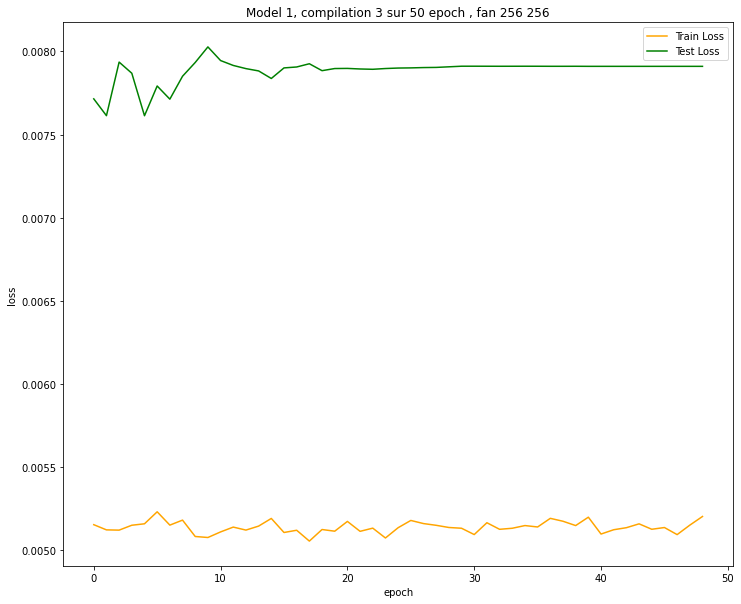

In [ ]:
plot_loss(model_history,"Model 1, compilation 3 sur 50 epoch")

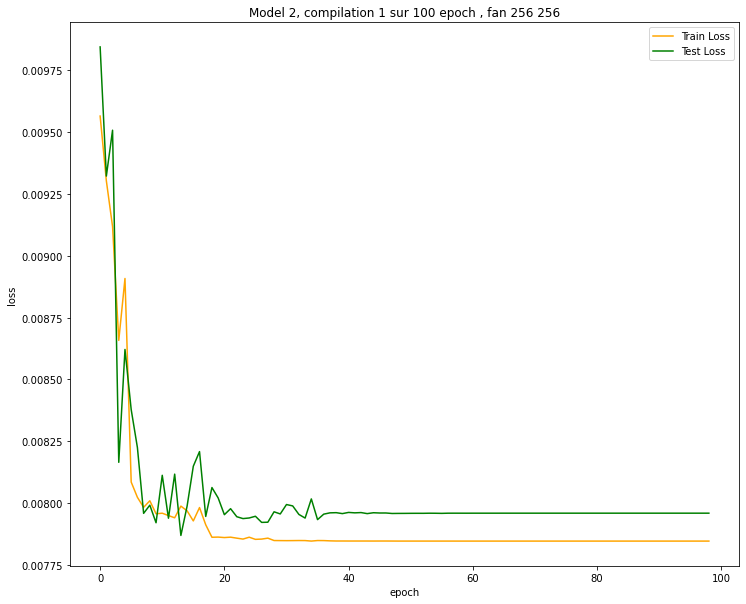

In [ ]:
plot_loss(model_history,"Model 2, compilation 1 sur 100 epoch")

100%|██████████| 1875/1875 [00:00<00:00, 2280.33it/s]


Ttest_indResult(statistic=-1.2500061056584533, pvalue=0.21145347449296753)


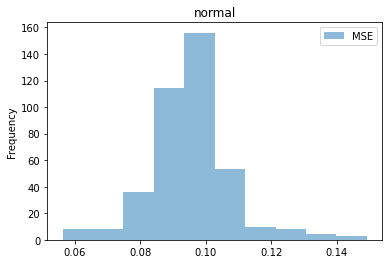

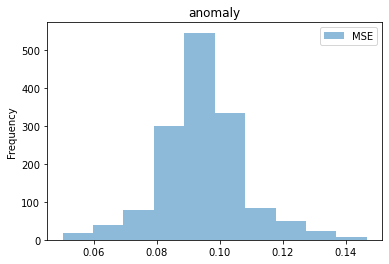

In [ ]:

plot_mse_with_predict(model_load)

100%|██████████| 1875/1875 [00:00<00:00, 2564.77it/s]


Ttest_indResult(statistic=0.035552510179866846, pvalue=0.9716429641618791)


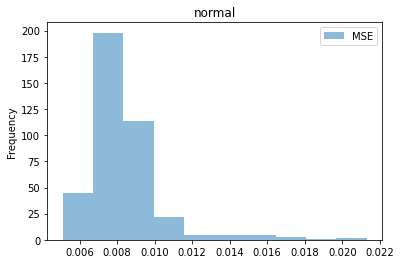

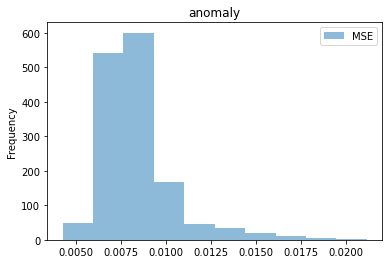

In [ ]:

plot_mse_with_predict(model_load)

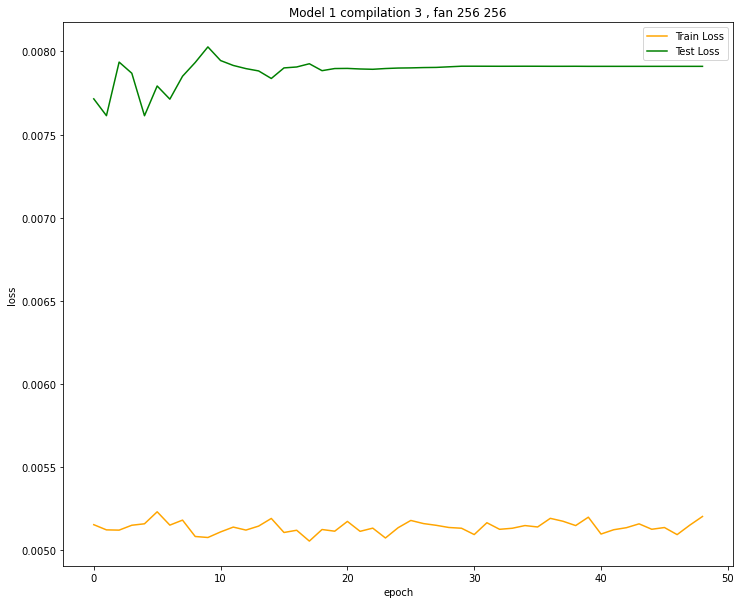

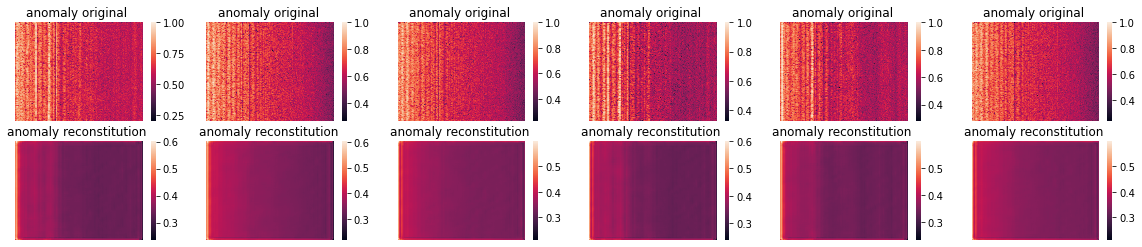

100%|██████████| 1875/1875 [00:00<00:00, 2564.16it/s]


Ttest_indResult(statistic=0.035552510179866846, pvalue=0.9716429641618791)


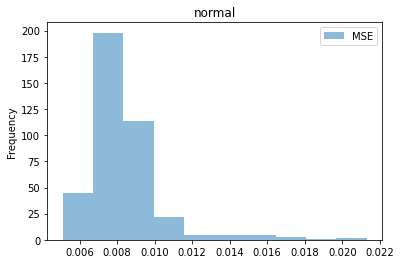

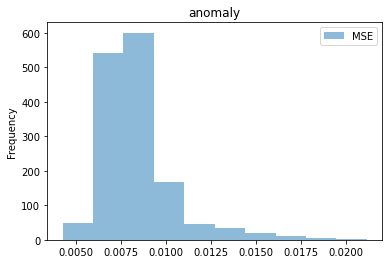

In [ ]:
visualisation(model_history,model_load=model_load,title="Model 1 compilation 3")